# WeatherPy

---

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Testing the functionality of the citipy module
major_cities = [citipy.nearest_city(40.7128, -74.0060).city_name, citipy.nearest_city(42.364506, -71.038887).city_name, citipy.nearest_city(47.6062, -122.3321).city_name, citipy.nearest_city( 37.773972, -122.431297).city_name, citipy.nearest_city(34.052235, -118.24368).city_name]

In [44]:
# Should output NYC, Boston, Seattle, San Fran and LA
major_cities

['new york city', 'boston', 'seattle', 'san francisco', 'los angeles']

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [46]:
cities

["'ohonua",
 'ushuaia',
 'amga',
 'tidjikja',
 'ilulissat',
 'tromso',
 'nagykoros',
 'nagqu',
 'alta',
 'tabou',
 'ratnagiri',
 'udachny',
 'tanjung pandan',
 'forster',
 'grytviken',
 'whitehorse',
 'edinburgh of the seven seas',
 'tommot',
 'potoci',
 'urangan',
 'abancay',
 'saiha',
 'klyuchi',
 'port-aux-francais',
 'dudinka',
 'college',
 'berdigestyakh',
 'suoyarvi',
 'kingston',
 "st. john's",
 'albany',
 'lebu',
 'blackmans bay',
 'christchurch',
 'adamstown',
 'uturoa',
 'invercargill',
 'jertih',
 'sodra sandby',
 "kapa'a",
 'chonchi',
 'bethel',
 'longyearbyen',
 'saint-pierre',
 'kon tum',
 'puerto ayora',
 'labytnangi',
 'stanley',
 'yellowknife',
 'vikhorevka',
 'margate',
 'bredasdorp',
 'copala',
 'papatowai',
 'yagry',
 'bac lieu',
 'jagnair',
 'shimoda',
 'tura',
 'puerto natales',
 'margaret river',
 'port alfred',
 'waitangi',
 'thompson',
 'kisangani',
 'windhoek',
 'portland',
 'taiohae',
 'hawaiian paradise park',
 'port elizabeth',
 'avarua',
 'qaqortoq',
 'pre

In [47]:
from pprint import pprint 

test_url =  "http://api.openweathermap.org/data/2.5/weather?"
test_query_url = f"{test_url}appid={weather_api_key}&units=metric&q="
test_city_url = test_query_url

test_response = requests.get(test_city_url + "Irvine").json()

In [48]:
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 33.6695, 'lon': -117.8231},
 'dt': 1696006439,
 'id': 5359777,
 'main': {'feels_like': 19.21,
          'humidity': 78,
          'pressure': 1011,
          'temp': 19.2,
          'temp_max': 20.67,
          'temp_min': 17.88},
 'name': 'Irvine',
 'sys': {'country': 'US',
         'id': 5876,
         'sunrise': 1695995042,
         'sunset': 1696037949,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 3.09}}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [49]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = f"{url}appid={weather_api_key}&units=metric&q="
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        response = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | amga
Processing Record 4 of Set 1 | tidjikja
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | tromso
Processing Record 7 of Set 1 | nagykoros
Processing Record 8 of Set 1 | nagqu
Processing Record 9 of Set 1 | alta
Processing Record 10 of Set 1 | tabou
Processing Record 11 of Set 1 | ratnagiri
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | tanjung pandan
Processing Record 14 of Set 1 | forster
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | tommot
Processing Record 19 of Set 1 | potoci
Processing Record 20 of Set 1 | urangan
Processing Record 21 of Set 1 | abancay
Processing Record 22 of Set 1 | saiha
Processing Record

In [50]:
len(city_data)

585

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,9.81,46,20,8.23,AR,1696006230
1,amga,60.8953,131.9608,-2.50,72,23,1.69,RU,1696006603
2,tidjikja,18.5564,-11.4271,41.52,7,80,5.31,MR,1696006271
3,ilulissat,69.2167,-51.1000,2.01,64,75,1.54,GL,1696006232
4,tromso,69.6496,18.9570,10.01,93,75,0.00,NO,1696006274


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.81,46,20,8.23,AR,1696006230
1,amga,60.8953,131.9608,-2.50,72,23,1.69,RU,1696006603
2,tidjikja,18.5564,-11.4271,41.52,7,80,5.31,MR,1696006271
3,ilulissat,69.2167,-51.1000,2.01,64,75,1.54,GL,1696006232
4,tromso,69.6496,18.9570,10.01,93,75,0.00,NO,1696006274


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

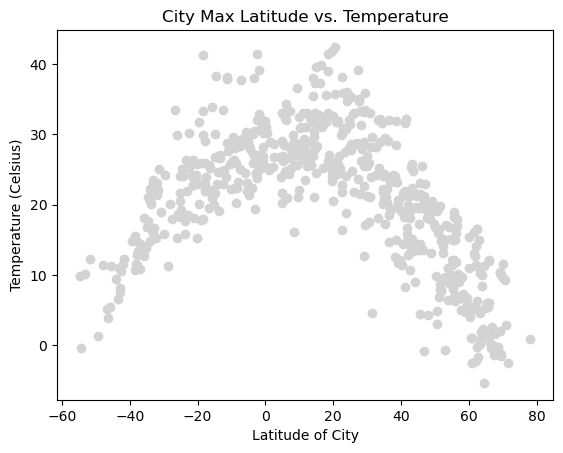

In [55]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], color="lightgray")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude of City")
plt.ylabel("Temperature (Celsius)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

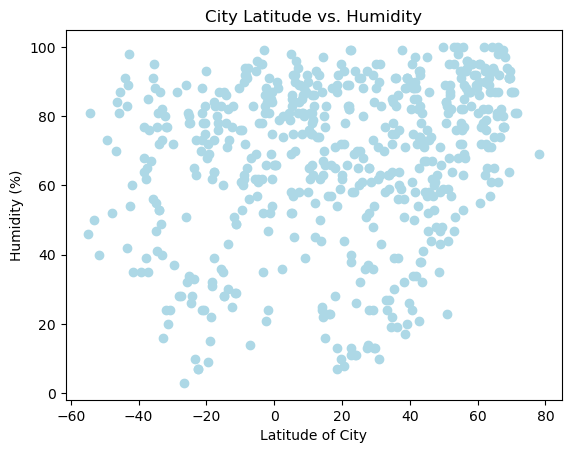

In [56]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], color="lightblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude of City")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

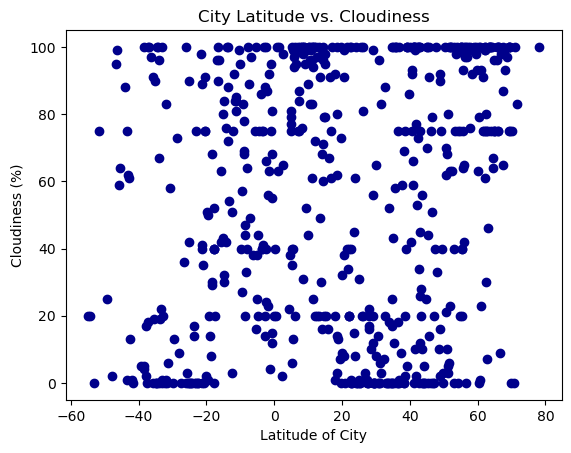

In [57]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], color="darkblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude of City")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

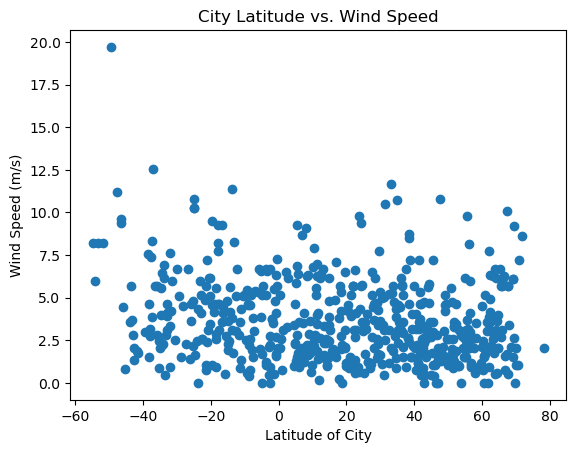

In [58]:
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude of City")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots

import scipy.stats as st

def generate_linreg_plot(df, feature_x, feature_y):

    slope, intercept, r, wp, std_err = st.linregress(df[feature_x], df[feature_y])

    fit = slope * df[feature_x] + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x=df[feature_x], y=df[feature_y])
    plt.xlabel(f"{feature_x}")
    plt.ylabel(f"{feature_y}")
    plt.plot(df[feature_x], fit, color="red", label=line_eq)

    print("The r value is:", r)

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

print("The number of northern cities is:", len(northern_hemi_df))

# Display sample data
northern_hemi_df.head()

The number of northern cities is: 401


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,amga,60.8953,131.9608,-2.50,72,23,1.69,RU,1696006603
2,tidjikja,18.5564,-11.4271,41.52,7,80,5.31,MR,1696006271
3,ilulissat,69.2167,-51.1000,2.01,64,75,1.54,GL,1696006232
4,tromso,69.6496,18.9570,10.01,93,75,0.00,NO,1696006274
5,nagykoros,47.0342,19.7786,22.97,53,0,0.00,HU,1696006603


In [61]:
northern_hemi_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

print("The number of southern cities is:", len(southern_hemi_df))

# Display sample data
southern_hemi_df.head()

The number of southern cities is: 184


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.81,46,20,8.23,AR,1696006230
11,tanjung pandan,-2.7500,107.6500,24.42,86,14,2.08,ID,1696006603
12,forster,-32.1667,152.5167,15.24,80,0,0.95,AU,1696006260
13,grytviken,-54.2811,-36.5092,-0.40,81,20,5.99,GS,1696006233
15,edinburgh of the seven seas,-37.0676,-12.3116,10.90,76,100,12.53,SH,1696006231


In [63]:
southern_hemi_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: -0.8139715334470268


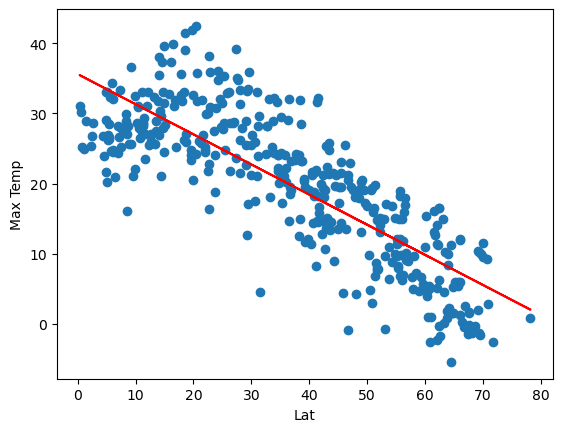

In [64]:
# Linear regression on Northern Hemisphere
generate_linreg_plot(northern_hemi_df, 'Lat', 'Max Temp')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: 0.7840336382830451


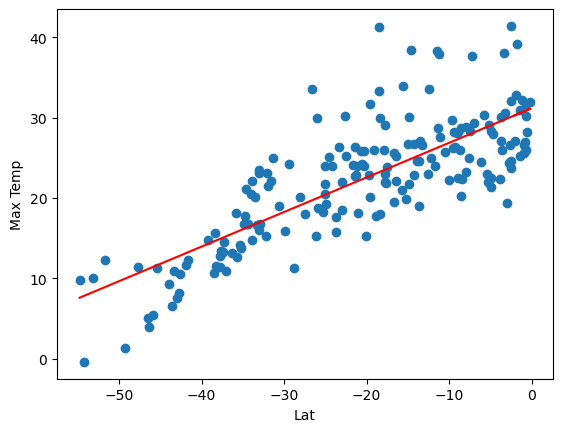

In [65]:
# Linear regression on Southern Hemisphere
generate_linreg_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:**: As we can see, the maximum temperature for a given city will increase with latitude if it is a city in the Southern Hemisphere, while the inverse is true for the Northern Hemisphere. This is because the absolute value of the latitude does not matter in this instance, but rather it is the relative location to the equator that will influence the max temperature of the city, where the equator has a latitude of zero. Also, given the relative large absolute values of the r coefficient, we can determine that there is a relatively strong linear relationship between the two features.

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: 0.20907015284578334


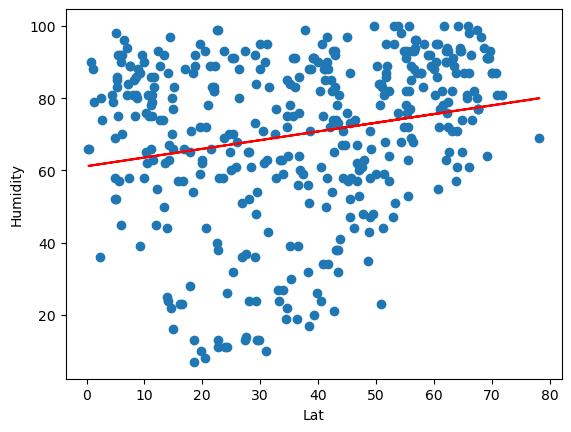

In [66]:
generate_linreg_plot(northern_hemi_df, 'Lat', 'Humidity')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: 0.10681721430263283


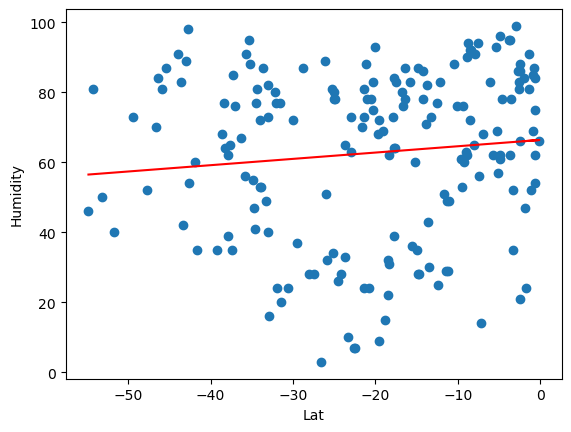

In [67]:
# Southern Hemisphere
generate_linreg_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:**: As we can see, the r coefficient between latitude and humidity is relatively small, meaning that there is not a particularly strong relationship between the two features. As such, latitiude is not a particularly good indicator of the humidity of a city.

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: 0.12455312604047479


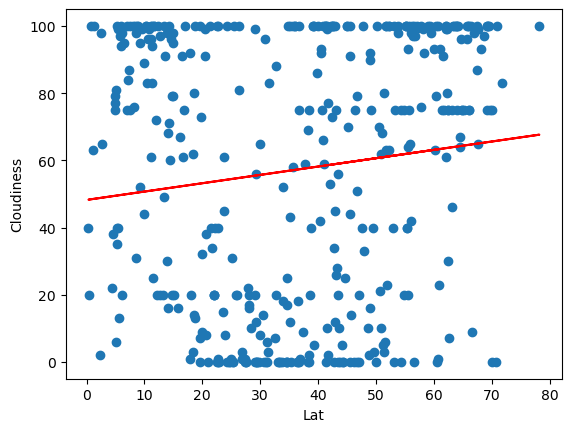

In [68]:
# Northern Hemisphere
generate_linreg_plot(northern_hemi_df, 'Lat', 'Cloudiness')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: 0.23188852455403777


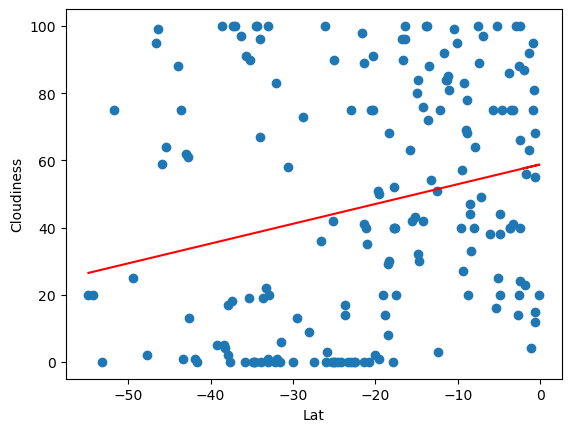

In [69]:
# Southern Hemisphere
generate_linreg_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:**: Similar to the last pair of features, the latitude of a city does not reliably indicate or predict the relative cloudiness of the city, particularly in the northern hemisphere. However, the coefficient for the southern hemisphere is relatively greater, meaning that we can determine that cities closer to the equator are generally cloudier than those further from the equator in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: -0.03807290759874804


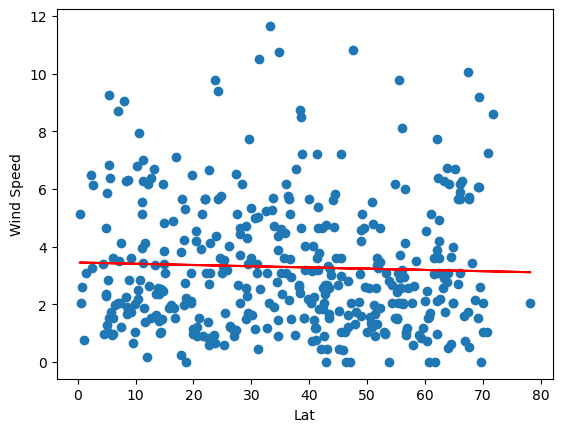

In [70]:
# Northern Hemisphere
generate_linreg_plot(northern_hemi_df, 'Lat', 'Wind Speed')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r value is: -0.258852140939593


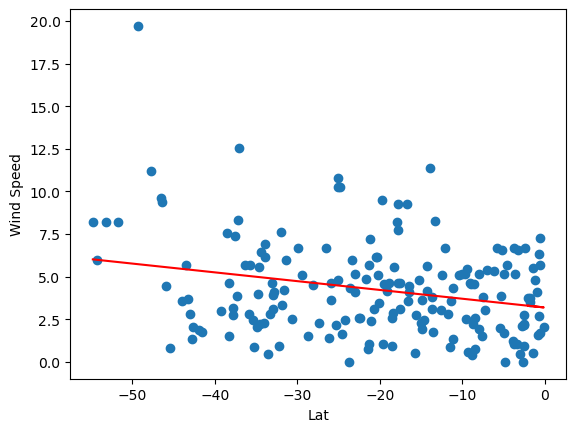

In [71]:
# Southern Hemisphere
generate_linreg_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** Again, latitude does not reliably predict the wind speed of a given city. Wind speed in all likelihood is not a feature that is influenced by the relative distance of a city from the equator, but is instead determined by other geographical factors